In [2]:
# Import dependencies
import nibabel as nib
import numpy as np
import cv2
import scipy.io
import os
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import circle_fit as cf
from utils import rotate

# Define file names
SAMPLE_NAME = "data\DBS_bG56"
HULL_FILE_NAME = os.path.join(SAMPLE_NAME,"hull_rh.mat")
PRECT_FILE_NAME = os.path.join(SAMPLE_NAME,"preop_ct.nii")
POSTCT_FILE_NAME = os.path.join(SAMPLE_NAME,"postop_ct.nii")
FLUORO_FILE_NAME = os.path.join(SAMPLE_NAME,"fluoro.tif")

# Read .mat file of mask indices
hull = scipy.io.loadmat(HULL_FILE_NAME)
points_hull=np.array(hull['mask_indices'])

# Read pre op CT
prect = nib.load(PRECT_FILE_NAME)
prect_data = np.nan_to_num(np.array(prect.get_fdata()))
Tmatrix = np.transpose(prect.affine)

# Read post op CT
postct = nib.load(POSTCT_FILE_NAME)
postct_data = np.nan_to_num(np.array(postct.get_fdata()))
print(postct_data.shape)

# Read fluoroscopy image
fluoror = imageio.imread(FLUORO_FILE_NAME)
fluoro = cv2.cvtColor(fluoror, cv2.COLOR_BGR2GRAY)

(256, 256, 176)


In [ ]:
# Define ideal inputs for DBS_bT20 to 3rd component function: fluoro and ct pins

# Format inputs as follows: pin left, pin right, DBS lead

pins_ct = np.array([[73, 73.0368, 52],[209, 147.6262207, 54], [147.276, 114, 85]])

pins_fl = np.array([[542, 1019],[1399, 539], [922,805]])

coords_2d = np.array([[109,626],[150,575],[196,525],[247,485],[303,452],[366,430],[423,413],[490,405]])

# Define ground truth electrode coordinates for comparison

aligned_coords_gt = np.array([[203,83.00006068],[198,76.00005692],[192,70.00005567],[185,64.00005567],[177,60.00005692],
                              [169,57.00005317],[161, 54.00004941],[151,53.00005442]])

In [3]:
# Run third component function
from fluoro_ct_alignment import project_to_2d
aligned_coords = project_to_2d(postct_data,fluoro,pins_fl,pins_ct,coords_2d)

fluoro_ct_alignment.py successfully executed.


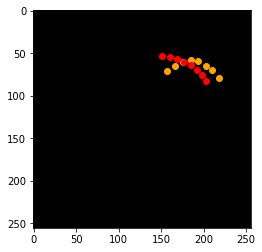

In [4]:
# Display predicted coordinates and ground truth coordinates on blank image
plt.imshow(np.zeros([256,256]),cmap='gray')
plt.scatter(aligned_coords[:,0],aligned_coords[:,1],color='orange')
plt.scatter(aligned_coords_gt[:,0],aligned_coords_gt[:,1],color='red')

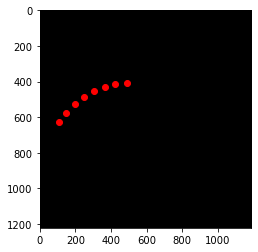

In [5]:
# Display original electrode coordinates on flouro
plt.imshow(np.zeros([1222,1187]),cmap='gray')
plt.scatter(coords_2d[:,0], coords_2d[:,1],color='red')

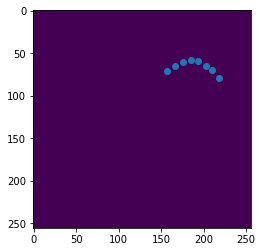

In [6]:
# Display predicted electrode coordinates on black image ('aligned' image)
# For now, this black image represents the 'aligned' image space
plt.imshow(np.zeros([256,256]))
plt.scatter(aligned_coords[:,0], aligned_coords[:,1])

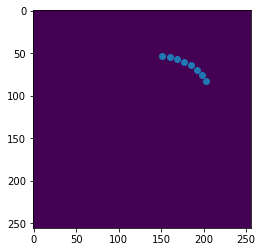

In [7]:
# Display the ground truth aligned electrode coordinates on black image
# For now, this black image represents the 'aligned' image space
import matplotlib.pyplot as plt
plt.imshow(np.zeros([256,256]))
plt.scatter(aligned_coords_gt[:,0], aligned_coords_gt[:,1])

In [8]:
# Calculate mean absolute error between predicted and ground truth sets of aligned coordinates
MAE = np.mean(np.abs(aligned_coords_gt - aligned_coords))
MAE

21.883354572516094